In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [52]:
#데이터셋 로드
data = pd.read_csv('creditcard.csv')

In [27]:
#데이터 정보
data.info()
#결측치 확인
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
#Class열 분리
x = data.drop(columns=['Time','Class'], axis=1)

# 정답
label = data['Class']

In [54]:
#데이터 전처리
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
#이상치 탐지
model = IsolationForest(contamination=0.0017, random_state=42)
model.fit(x_scaled)

,n_estimators,100
,max_samples,'auto'
,contamination,0.0017
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [31]:
#결과
ano_pred = model.predict(x_scaled)
data['Anomaly'] = ano_pred

In [32]:
#이상치 및 정상 데이터 수 확인
outliers = data[data['Anomaly'] == -1]
normal = data[data['Anomaly'] == 1]

print(f'이상치 수: {len(outliers)}')
print(f'정상치 수: {len(normal)}')

이상치 수: 485
정상치 수: 284322


In [33]:
# 이상치 범주 출력
print("\n이상치 데이터의 주요 통계:")
print(outliers.describe())


이상치 데이터의 주요 통계:
                Time          V1          V2          V3          V4  \
count     485.000000  485.000000  485.000000  485.000000  485.000000   
mean    82089.317526  -14.486900   -3.596970   -9.877952    4.723799   
std     47942.898726    8.991113   15.565143    7.561864    4.030103   
min      1264.000000  -56.407510  -72.715728  -48.325589   -5.251492   
25%     41233.000000  -19.630173  -15.126570  -13.443115    1.136134   
50%     78296.000000  -12.603720    3.965891   -8.060562    5.270891   
75%    127991.000000   -7.114686    7.378042   -4.275321    7.604936   
max    172273.000000   -1.426623   22.057729    9.382558   16.875344   

               V5          V6          V7          V8          V9  ...  \
count  485.000000  485.000000  485.000000  485.000000  485.000000  ...   
mean    -6.207423    1.479985   -3.779002   -5.363924   -0.928205  ...   
std     10.565538    7.107559   14.390284   12.674439    4.299458  ...   
min   -113.743307  -26.160506  -43.557

In [34]:
print("\nClass와 Anomaly의 관계 분석:")
comparison = data.groupby(['Class', 'Anomaly']).size().unstack(fill_value=0)
print(comparison)


Class와 Anomaly의 관계 분석:
Anomaly   -1       1
Class               
0        346  283969
1        139     353


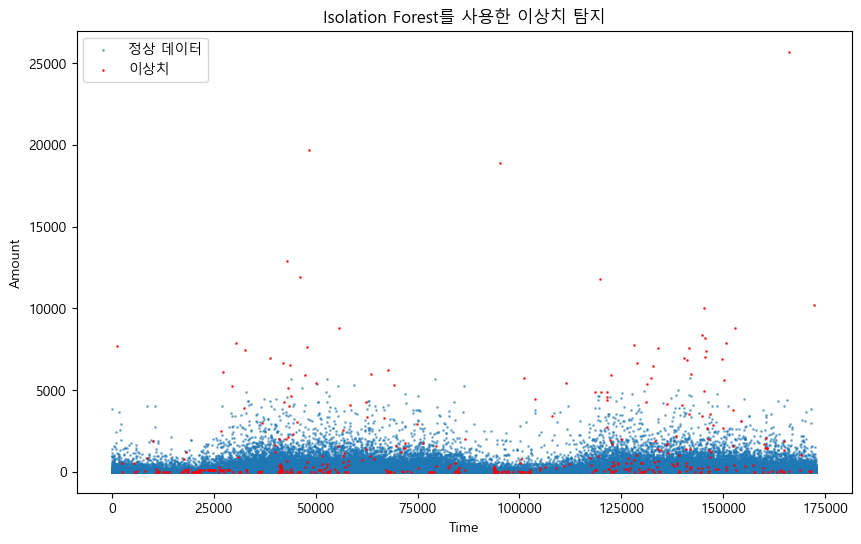

In [35]:
# Amount와 Time을 기준으로 이상치와 정상치를 시각화
mpl.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
plt.scatter(normal['Time'], normal['Amount'], label='정상 데이터', s=1, alpha=0.5)
plt.scatter(outliers['Time'], outliers['Amount'], label='이상치', color='red', s=1,  alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Isolation Forest를 사용한 이상치 탐지')
plt.legend()
plt.show()

In [49]:
#모델 생성
dbscan = DBSCAN(eps=2, min_samples=5)

In [57]:
data['Cluster'] = dbscan.fit_predict(x_scaled)

In [58]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [65]:
#이상치 탐지
data['Anomaly'] = data['Cluster'].apply(lambda x: "Anomaly" if x == -1 else "Normal")

data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster,Anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,Anomaly
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,Normal
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1,Normal
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,Normal
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-1,Anomaly
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,3,Normal
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,1,Normal


In [69]:
outliers = data[data['Anomaly'] == 'Anomaly']
normal = data[data['Anomaly'] != 'Nomal']

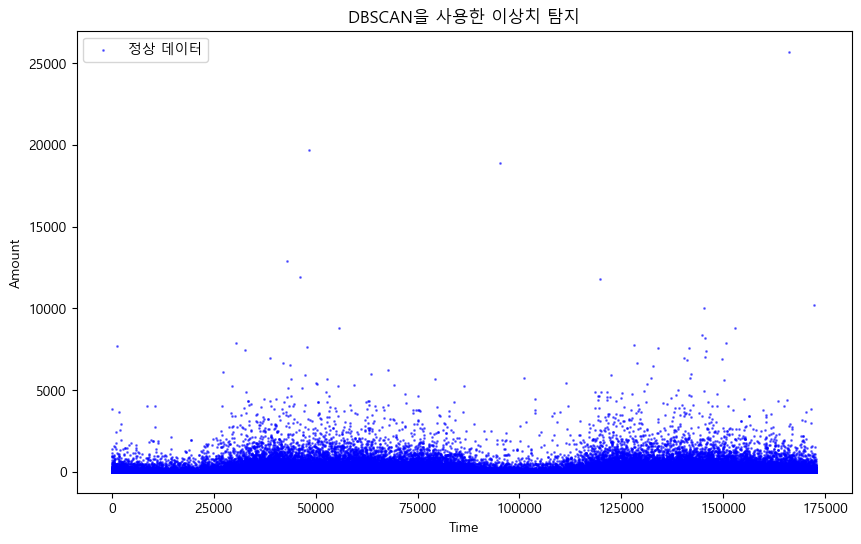

In [74]:
#정상치만 출력
plt.figure(figsize=(10, 6))
plt.scatter(normal['Time'], normal['Amount'], label='정상 데이터', c='blue',s=1, alpha=0.5)
#plt.scatter(outliers['Time'], outliers['Amount'], label='이상치', c='red', s=1,  alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('DBSCAN을 사용한 이상치 탐지')
plt.legend()
plt.show()

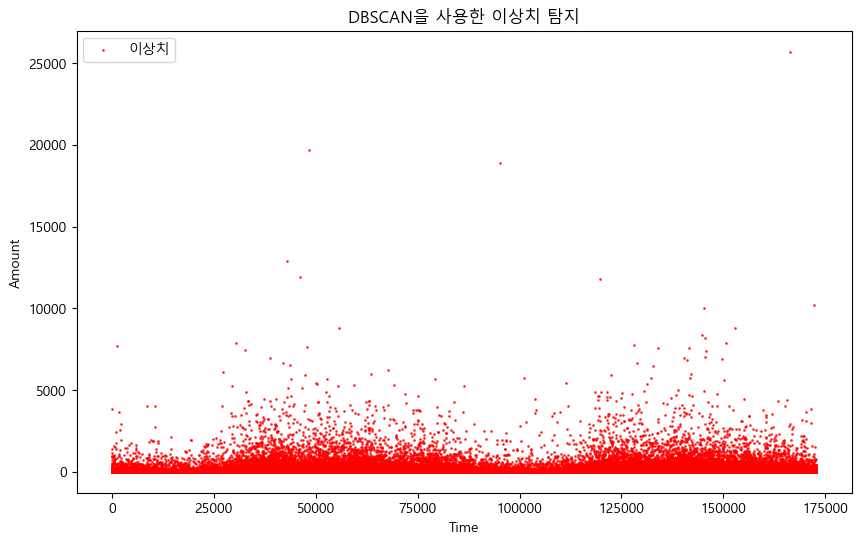

In [ ]:
#이상치만 출력
plt.figure(figsize=(10, 6))
#plt.scatter(normal['Time'], normal['Amount'], label='정상 데이터', c='blue',s=1,
plt.scatter(outliers['Time'], outliers['Amount'], label='이상치', c='red', s=1,  alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('DBSCAN을 사용한 이상치 탐지')
plt.legend()
plt.show()

In [72]:
print("\nClass와 Anomaly의 관계 분석:")
comparison = data.groupby(['Class', 'Anomaly']).size().unstack(fill_value=0)
print(comparison)


Class와 Anomaly의 관계 분석:
Anomaly  Anomaly  Normal
Class                   
0          49732  234583
1            419      73
